# Creating a Filter, Edge Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

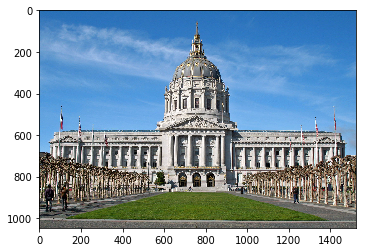

In [2]:
img = cv2.imread('images/city_hall.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

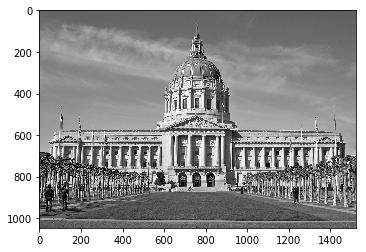

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## Custom filter
The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

### x vs. y
In the above images, you can see that the gradients taken in both the xx and the yy directions detect the edges of the brain and pick up other edges. Taking the gradient in the xx direction emphasizes edges closer to vertical. Alternatively, taking the gradient in the yy direction emphasizes edges closer to horizontal.

### Magnitude
Sobel also detects which edges are strongest. This is encapsulated by the magnitude of the gradient; the greater the magnitude, the stronger the edge is. The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the xx and yy directions, the magnitude is the square root of the sum of the squares.

In [4]:
# Creating sobel filter
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_y = np.transpose(sobel_x)

In [5]:
# Applying sobel filter with 64F depth , 32F depth and -1 depth
filter_y_64f = cv2.filter2D(gray, cv2.CV_64F, sobel_y)
filter_x_64f = cv2.filter2D(gray, cv2.CV_64F, sobel_x)

filter_y_32f = cv2.filter2D(gray, cv2.CV_32F, sobel_y)
filter_x_32f = cv2.filter2D(gray, cv2.CV_32F, sobel_x)

filter_y_1 = cv2.filter2D(gray, -1, sobel_y)
filter_x_1 = cv2.filter2D(gray, -1, sobel_x)

In [6]:
#  Magintude of sobel filter x and y
mag_64f = cv2.magnitude(filter_x_64f, filter_y_64f)
mag_32f = cv2.magnitude(filter_x_32f, filter_y_32f)
mag_1 = filter_x_1 + filter_y_1

In [7]:
# Creating binary image
_, binary_64f = cv2.threshold(mag_64f, 100, 255, cv2.THRESH_BINARY)
_, binary_32f = cv2.threshold(mag_32f , 100, 255, cv2.THRESH_BINARY)
_, binary_1 = cv2.threshold(mag_1 , 100, 255, cv2.THRESH_BINARY)

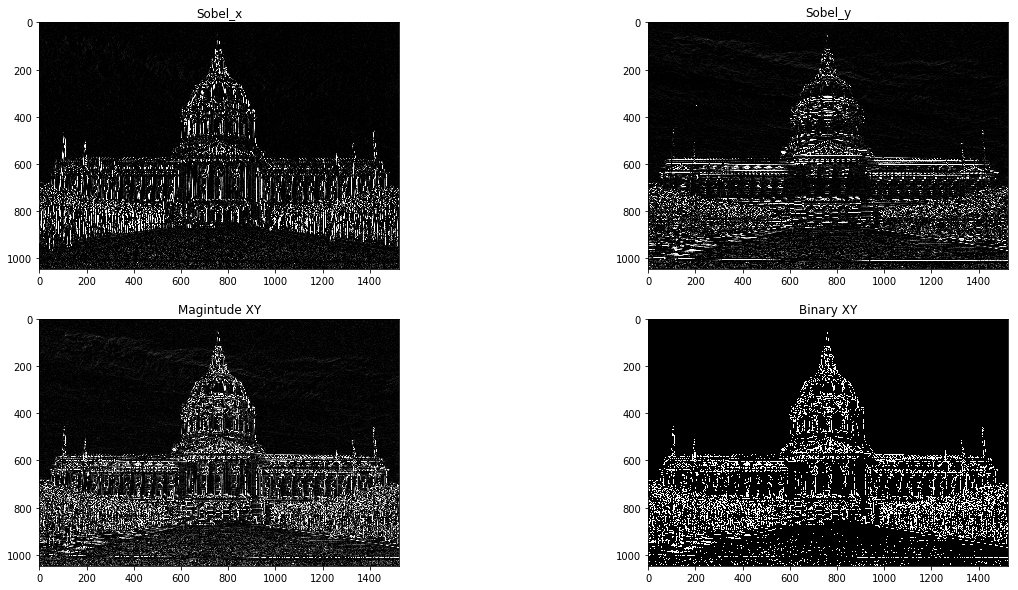

In [8]:
# Display sobel -1 depth
fx, plots = plt.subplots(2, 2, figsize=(20,10))

plots[0][0].set_title("Sobel_x")
plots[0][0].imshow(filter_x_1, cmap='gray')

plots[0][1].set_title("Sobel_y")
plots[0][1].imshow(filter_y_1, cmap='gray')

plots[1][0].set_title("Magintude XY")
plots[1][0].imshow(mag_1, cmap='gray')

plots[1][1].set_title("Binary XY")
plots[1][1].imshow(binary_1, cmap='gray')

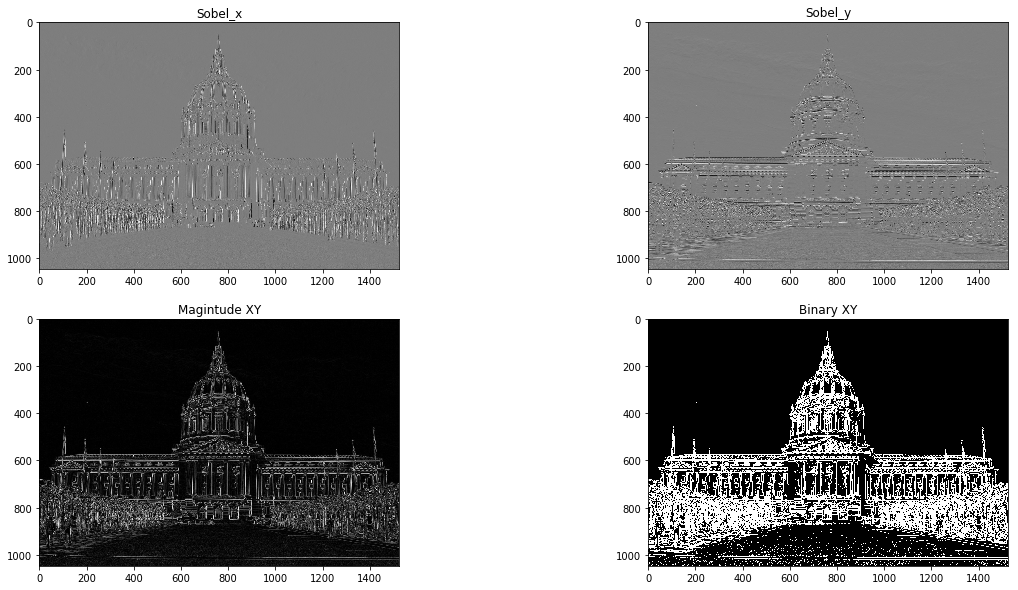

In [9]:
# Display sobel 64f depth
fx, plots = plt.subplots(2, 2, figsize=(20,10))

plots[0][0].set_title("Sobel_x")
plots[0][0].imshow(filter_x_64f, cmap='gray')

plots[0][1].set_title("Sobel_y")
plots[0][1].imshow(filter_y_64f, cmap='gray')

plots[1][0].set_title("Magintude XY")
plots[1][0].imshow(mag_64f, cmap='gray')

plots[1][1].set_title("Binary XY")
plots[1][1].imshow(binary_64f, cmap='gray')

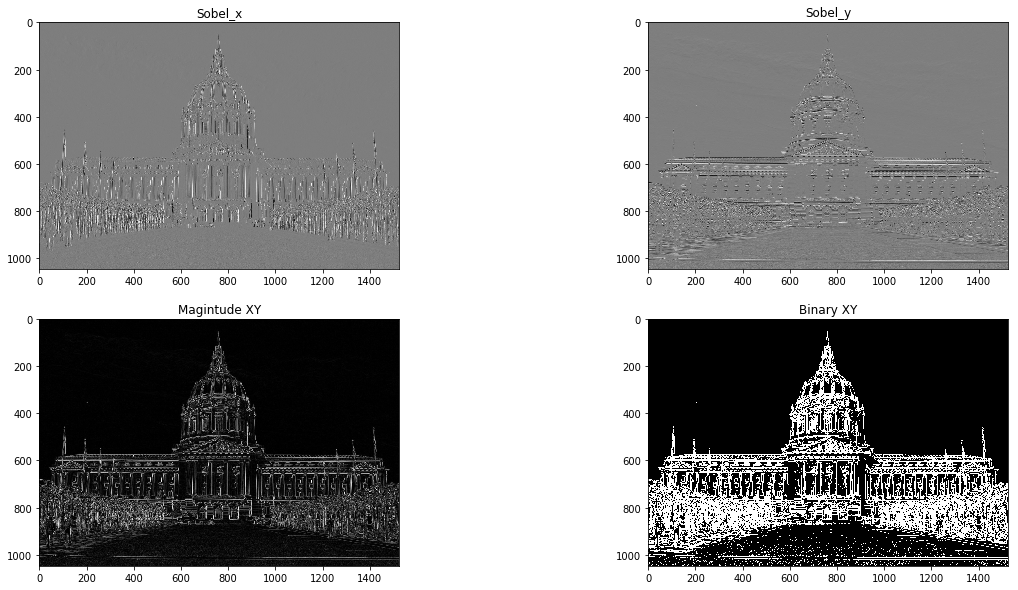

In [10]:
# Display sobel 32 depth
fx, plots = plt.subplots(2, 2, figsize=(20,10))

plots[0][0].set_title("Sobel_x")
plots[0][0].imshow(filter_x_32f, cmap='gray')

plots[0][1].set_title("Sobel_y")
plots[0][1].imshow(filter_y_32f, cmap='gray')

plots[1][0].set_title("Magintude XY")
plots[1][0].imshow(mag_32f, cmap='gray')

plots[1][1].set_title("Binary XY")
plots[1][1].imshow(binary_32f, cmap='gray')

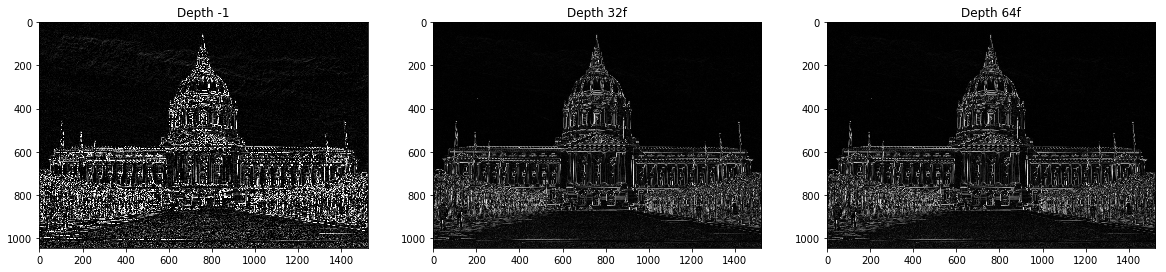

In [11]:
# Display sobel -1, 32f, 64 depth
fx, plots = plt.subplots(1, 3, figsize=(20,10))

plots[0].set_title("Depth -1")
plots[0].imshow(mag_1, cmap='gray')

plots[1].set_title("Depth 32f")
plots[1].imshow(mag_32f, cmap='gray')

plots[2].set_title("Depth 64f")
plots[2].imshow(mag_64f, cmap='gray')